# Standardization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('Social_Network_Ads.csv')

In [3]:
df=df.iloc[:,2:]

In [4]:
df.sample(5)

Age  EstimatedSalary  Purchased
2     26            43000          0
316   54           104000          1
147   41            30000          0
331   48           119000          1
274   57            26000          1

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,0:2],df.iloc[:,2],test_size=0.3,random_state = 0)

In [6]:
x_train

Age  EstimatedSalary
92    26            15000
223   60           102000
234   38           112000
232   40           107000
377   42            53000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[280 rows x 2 columns]

In [7]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

# StandardScalar

In [8]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [9]:
x_train_scaler = pd.DataFrame(x_train_scaler,columns = x_train.columns)
x_test_scaler = pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [10]:
np.round(x_train.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean    37.9          69807.1
std     10.2          34641.2
min     18.0          15000.0
25%     30.0          43000.0
50%     37.0          70500.0
75%     46.0          88000.0
max     60.0         150000.0

In [16]:
np.round(x_train_scaler.describe(),1)

Age  EstimatedSalary
count  280.0            280.0
mean     0.0              0.0
std      1.0              1.0
min     -1.9             -1.6
25%     -0.8             -0.8
50%     -0.1              0.0
75%      0.8              0.5
max      2.2              2.3

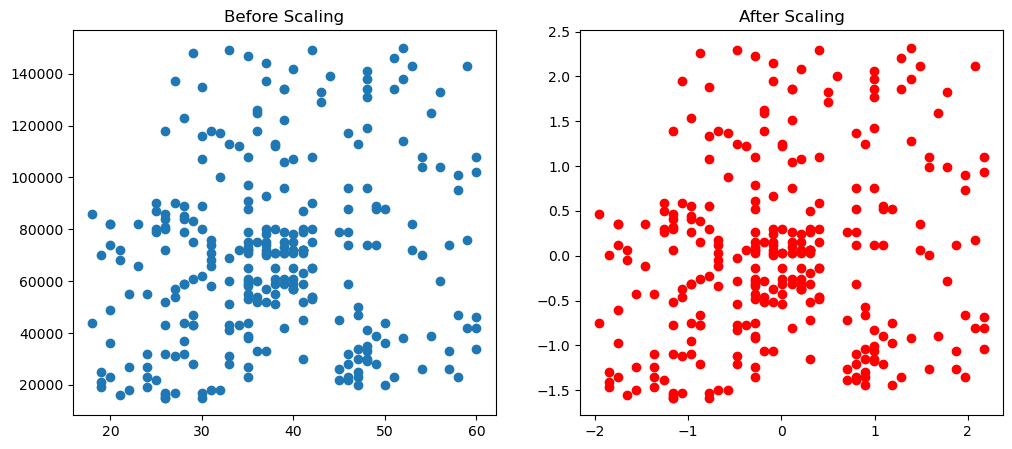

In [19]:
fig,(ax1, ax2) = plt.subplots(ncols=2,figsize= (12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaler["Age"], x_train_scaler['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

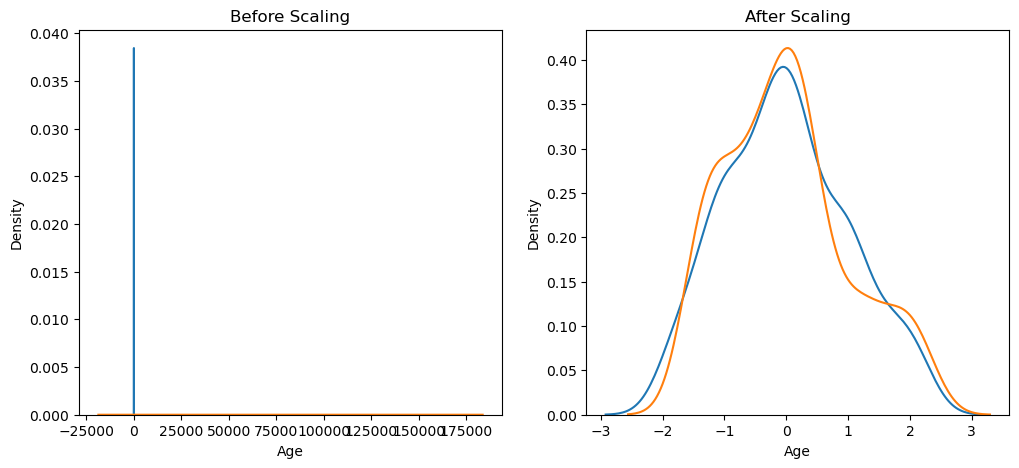

In [22]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaler['Age'],ax=ax2)
sns.kdeplot(x_train_scaler['EstimatedSalary'],ax=ax2)

<Axes: title={'center': 'Age Distribution After Scaling'}, xlabel='Age', ylabel='Density'>

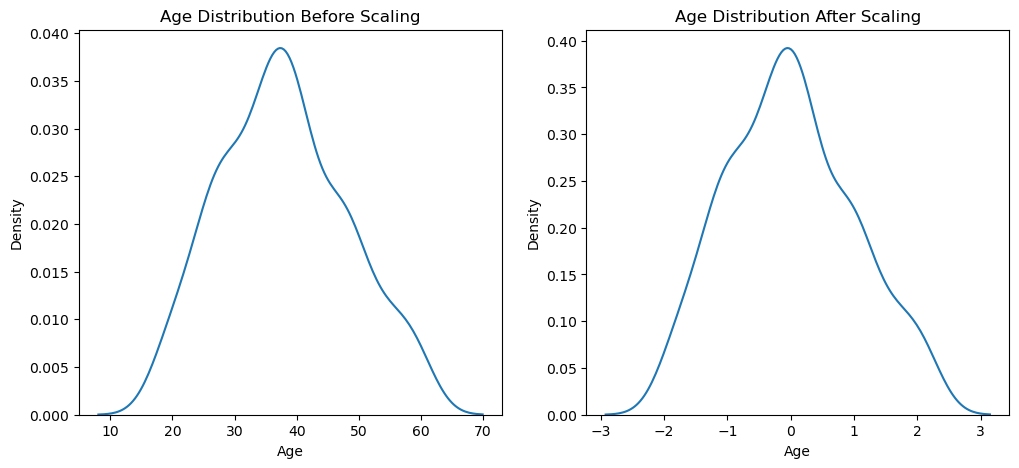

In [23]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(x_train['Age'],ax=ax1)

ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(x_train_scaler['Age'],ax=ax2)

In [24]:
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression()
lr_train_scaled = LogisticRegression()

In [25]:
lr.fit(x_train,y_train)
lr_train_scaled.fit(x_train_scaler,y_train)

LogisticRegression()

In [26]:
y_predict = lr.predict(x_test)

In [27]:
y_predict_scaled = lr_train_scaled.predict(x_test_scaler)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.6583333333333333


In [15]:
print(accuracy_score(y_test,y_predict_scaled))

0.8666666666666667


# Effect of outlier

In [29]:
#there will be no effect on the data after Scaling

In [36]:
df =df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':{1000,250000,350000},'Purchased':[0,1,1]}),ignore_index=True)

TypeError: 'set' type is unordered

# Normalization

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv("wine_data.csv",header=None,usecols =[0,1,2])
df.columns=['Class label','Alchol','Malic acid']

FileNotFoundError: [Errno 2] No such file or directory: 'wine_data.csv'